<a href="https://colab.research.google.com/github/PyAshishMhatre/Channel-Analysis-using-Youtube-Data-API/blob/main/YoutubeAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dependencies


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load Dataset 

In [5]:
channeldf = pd.read_csv('/content/ChannelData.csv', index_col='Unnamed: 0')

# Working on Channel Data 

In [6]:
channeldf.head()

,Channel_name,Channel_Created,Channel_country,Channel_uploads,Channel_viewcount,Channel_subcount,Channel_vidcount
0,Marques Brownlee,2008-03-21T15:25:54Z,US,UUBJycsmduvYEL83R_U4JriQ,2855578687,15200000,1410
1,Linus Tech Tips,2008-11-25T00:46:52Z,CA,UUXuqSBlHAE6Xw-yeJA0Tunw,5425641560,14300000,5614
2,Austin Evans,2007-08-05T01:39:45Z,US,UUXGgrKt94gR6lmN4aN3mYTg,1183104884,5220000,1788
3,UrAvgConsumer,2012-01-01T23:54:16Z,US,UU9fSZHEh6XsRpX-xJc6lT3A,453544303,3160000,1005
4,Mrwhosetheboss,2011-04-20T12:10:24Z,GB,UUMiJRAwDNSNzuYeN2uWa0pA,1491243523,9640000,1399


In [7]:
channeldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Channel_name       8 non-null      object
 1   Channel_Created    8 non-null      object
 2   Channel_country    7 non-null      object
 3   Channel_uploads    8 non-null      object
 4   Channel_viewcount  8 non-null      int64 
 5   Channel_subcount   8 non-null      int64 
 6   Channel_vidcount   8 non-null      int64 
dtypes: int64(3), object(4)
memory usage: 512.0+ bytes


Convert Date column from UTC format to MM/DD/YY format 

In [8]:
channeldf['Channel_Created'] = pd.to_datetime(channeldf['Channel_Created'])
channeldf['Channel_Created'] = channeldf['Channel_Created'].dt.strftime('%m/%d/%Y')
channeldf['Channel_Created'] = pd.to_datetime(channeldf['Channel_Created'])

In [9]:
channeldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Channel_name       8 non-null      object        
 1   Channel_Created    8 non-null      datetime64[ns]
 2   Channel_country    7 non-null      object        
 3   Channel_uploads    8 non-null      object        
 4   Channel_viewcount  8 non-null      int64         
 5   Channel_subcount   8 non-null      int64         
 6   Channel_vidcount   8 non-null      int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 512.0+ bytes


In [10]:
channeldf

,Channel_name,Channel_Created,Channel_country,Channel_uploads,Channel_viewcount,Channel_subcount,Channel_vidcount
0,Marques Brownlee,2008-03-21,US,UUBJycsmduvYEL83R_U4JriQ,2855578687,15200000,1410
1,Linus Tech Tips,2008-11-25,CA,UUXuqSBlHAE6Xw-yeJA0Tunw,5425641560,14300000,5614
2,Austin Evans,2007-08-05,US,UUXGgrKt94gR6lmN4aN3mYTg,1183104884,5220000,1788
3,UrAvgConsumer,2012-01-01,US,UU9fSZHEh6XsRpX-xJc6lT3A,453544303,3160000,1005
4,Mrwhosetheboss,2011-04-20,GB,UUMiJRAwDNSNzuYeN2uWa0pA,1491243523,9640000,1399
5,Dave2D,2015-01-05,CA,UUVYamHliCI9rw1tHR1xbkfw,664653933,3480000,642
6,Unbox Therapy,2010-12-21,NaN,UUsTcErHg8oDvUnTzoqsYeNw,4228241509,18200000,2004
7,Technical Guruji,2015-10-19,IN,UUOhHO2ICt0ti9KAh-QHvttQ,2914231863,21900000,4229


#View count comparsion

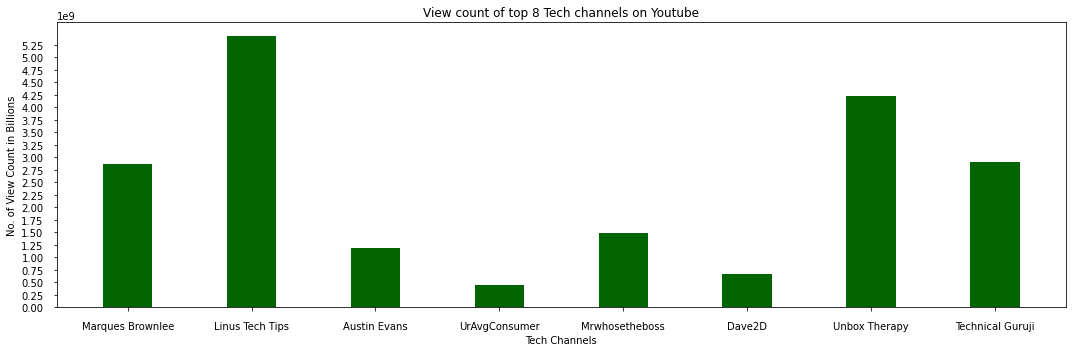

In [11]:
fig, ax = plt.subplots(figsize =(15, 5))
# creating the bar plot
plt.bar(channeldf['Channel_name'], channeldf['Channel_viewcount'], color ='darkgreen',
        width = 0.4,)
step_value = 250000000
plt.yticks(np.arange(0, max(channeldf['Channel_viewcount']), step_value))
plt.xlabel('Tech Channels')
plt.ylabel("No. of View Count in Billions")
plt.title("View count of top 8 Tech channels on Youtube")
# Add padding between axes and, labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 10)
plt.tight_layout()
plt.show()

#Subscriber base % compared to each other

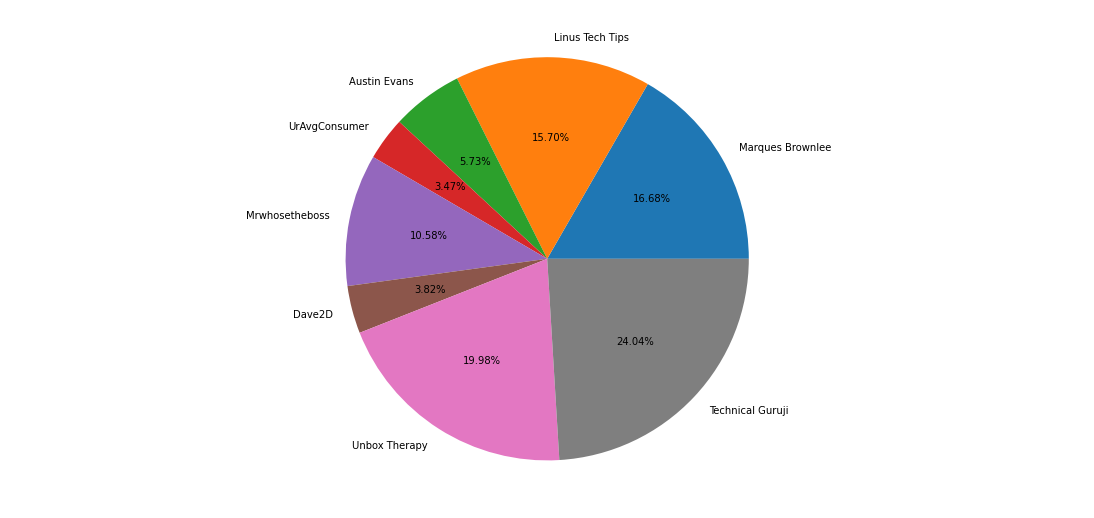

In [12]:
fig = plt.figure(figsize =(15, 7))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(channeldf['Channel_subcount'], labels = channeldf['Channel_name'],autopct='%1.2f%%')
plt.show()

#Total number of videos uploaded on channel

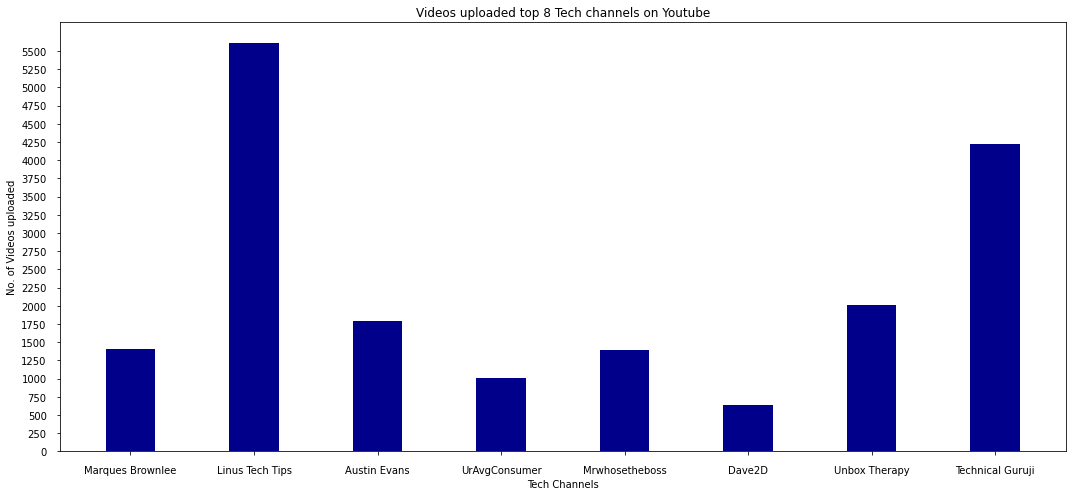

In [13]:
fig, ax = plt.subplots(figsize =(15, 7))
# creating the bar plot
plt.bar(channeldf['Channel_name'], channeldf['Channel_vidcount'], color ='darkblue',
        width = 0.4,)
step_value = 250
plt.yticks(np.arange(0, max(channeldf['Channel_vidcount']), step_value))
plt.xlabel('Tech Channels')
plt.ylabel("No. of Videos uploaded")
plt.title("Videos uploaded top 8 Tech channels on Youtube")
# Add padding between axes and, labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 10)
plt.tight_layout()
plt.show()

#Relationship between channel subscriber count and View count with total video count as hue parameter

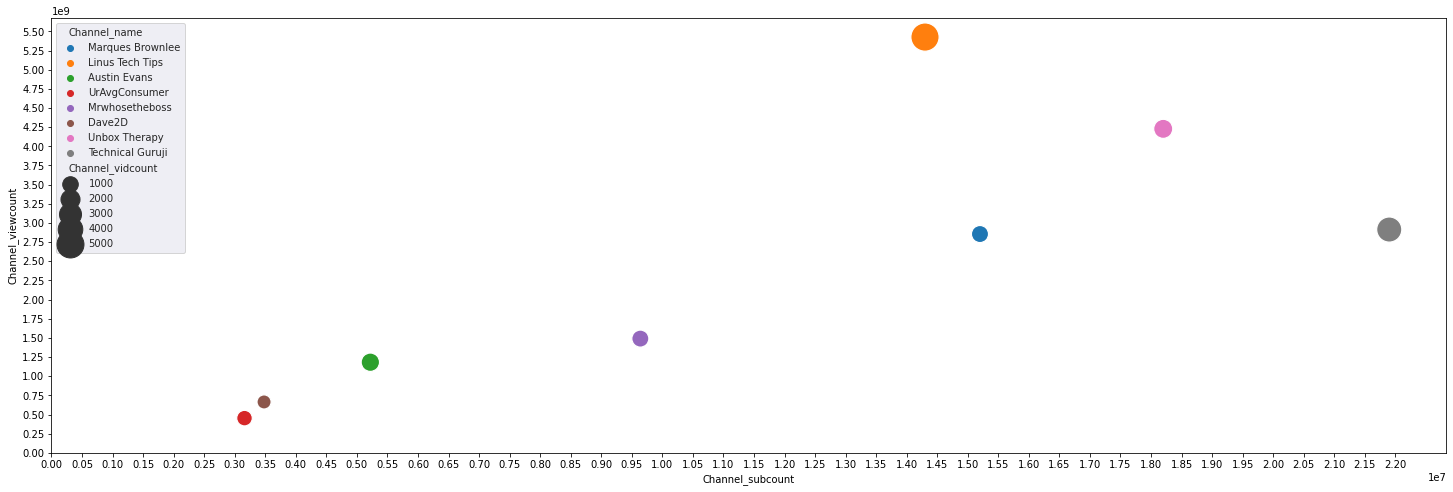

In [14]:
fig, ax = plt.subplots(figsize =(25, 8))
sns.set_style("darkgrid")
sns.scatterplot(data=channeldf, x=channeldf['Channel_subcount'], y=channeldf['Channel_viewcount'], size= channeldf['Channel_vidcount'], hue=channeldf['Channel_name'], alpha=1, sizes=(200,800))
step_value = 500000
step = 250000000
plt.xticks(np.arange(0, max(channeldf['Channel_subcount']) + step_value, step_value))
plt.yticks(np.arange(0, max(channeldf['Channel_viewcount']) + step, step))
# show the graph
plt.show()

#Finding Correlation between Subcriber Count, View Count & Total Video Count

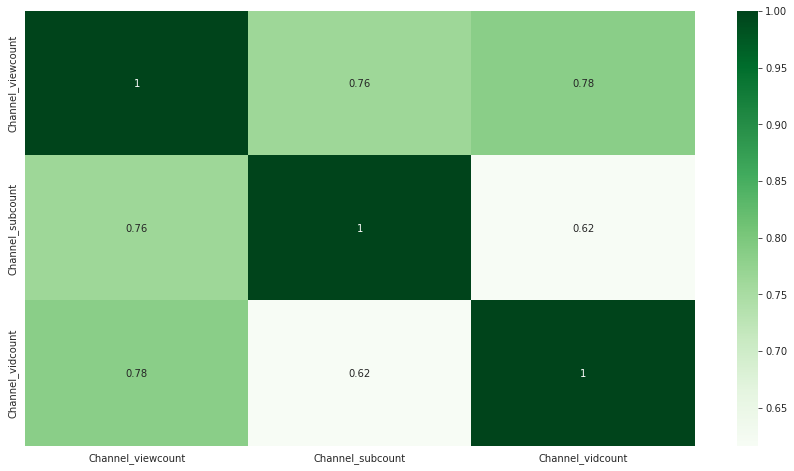

In [15]:

fig, ax = plt.subplots(figsize =(15, 8))
corr_matrix=channeldf.corr()
 
# plot it
sns.heatmap(corr_matrix, cmap='Greens', annot=True)

# Working on Video Details

In [16]:
videodf = pd.read_csv('/content/VideoDetails.csv',index_col='Unnamed: 0')


In [17]:
videodf.head()


,Video_id,Video_published_date,Channel_name,Video_description,Video_position
0,tqaVPn4YFaY,2022-01-16T16:29:45Z,Unbox Therapy,My Tesla Model S Plaid has arrived. What a tim...,0
1,Es1Uolu0chc,2022-01-15T18:07:18Z,Unbox Therapy,Huawei is finally back in the studio with some...,1
2,xXpWulEEhGw,2022-01-10T17:45:16Z,Unbox Therapy,This is the new ASUS ROG Flow Z13 it packs RTX...,2
3,JpV0KHGqn_w,2022-01-07T03:20:05Z,Unbox Therapy,Unboxing the new Realme GT 2 Pro and checking ...,3
4,9zQq-3Kn0uM,2021-12-31T20:22:33Z,Unbox Therapy,Please see below for contest details: (open to...,4


#Type conversion

In [18]:
videodf['Video_published_date'] = pd.to_datetime(videodf['Video_published_date'])

In [19]:
videodf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18282 entries, 0 to 18281
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Video_id              18282 non-null  object             
 1   Video_published_date  18282 non-null  datetime64[ns, UTC]
 2   Channel_name          18282 non-null  object             
 3   Video_description     18272 non-null  object             
 4   Video_position        18282 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 857.0+ KB


Updated Datetime type

In [20]:
videodf.head()

,Video_id,Video_published_date,Channel_name,Video_description,Video_position
0,tqaVPn4YFaY,2022-01-16 16:29:45+00:00,Unbox Therapy,My Tesla Model S Plaid has arrived. What a tim...,0
1,Es1Uolu0chc,2022-01-15 18:07:18+00:00,Unbox Therapy,Huawei is finally back in the studio with some...,1
2,xXpWulEEhGw,2022-01-10 17:45:16+00:00,Unbox Therapy,This is the new ASUS ROG Flow Z13 it packs RTX...,2
3,JpV0KHGqn_w,2022-01-07 03:20:05+00:00,Unbox Therapy,Unboxing the new Realme GT 2 Pro and checking ...,3
4,9zQq-3Kn0uM,2021-12-31 20:22:33+00:00,Unbox Therapy,Please see below for contest details: (open to...,4


#Group by year
Group count of videos uploaded each year for respective Youtube channel

In [21]:
def aggyear(colname):
  plotdata = videodf[videodf['Channel_name'] == colname]
  plotdata['Video_published_date'] = plotdata['Video_published_date'].dt.year
  plotdata = plotdata.groupby('Video_published_date').count()
  plotdata.drop(index=2022, inplace=True)
  return(plotdata.index,plotdata['Video_id'],plotdata)

#Using line graph--subplots to display all channel upload frequency by years

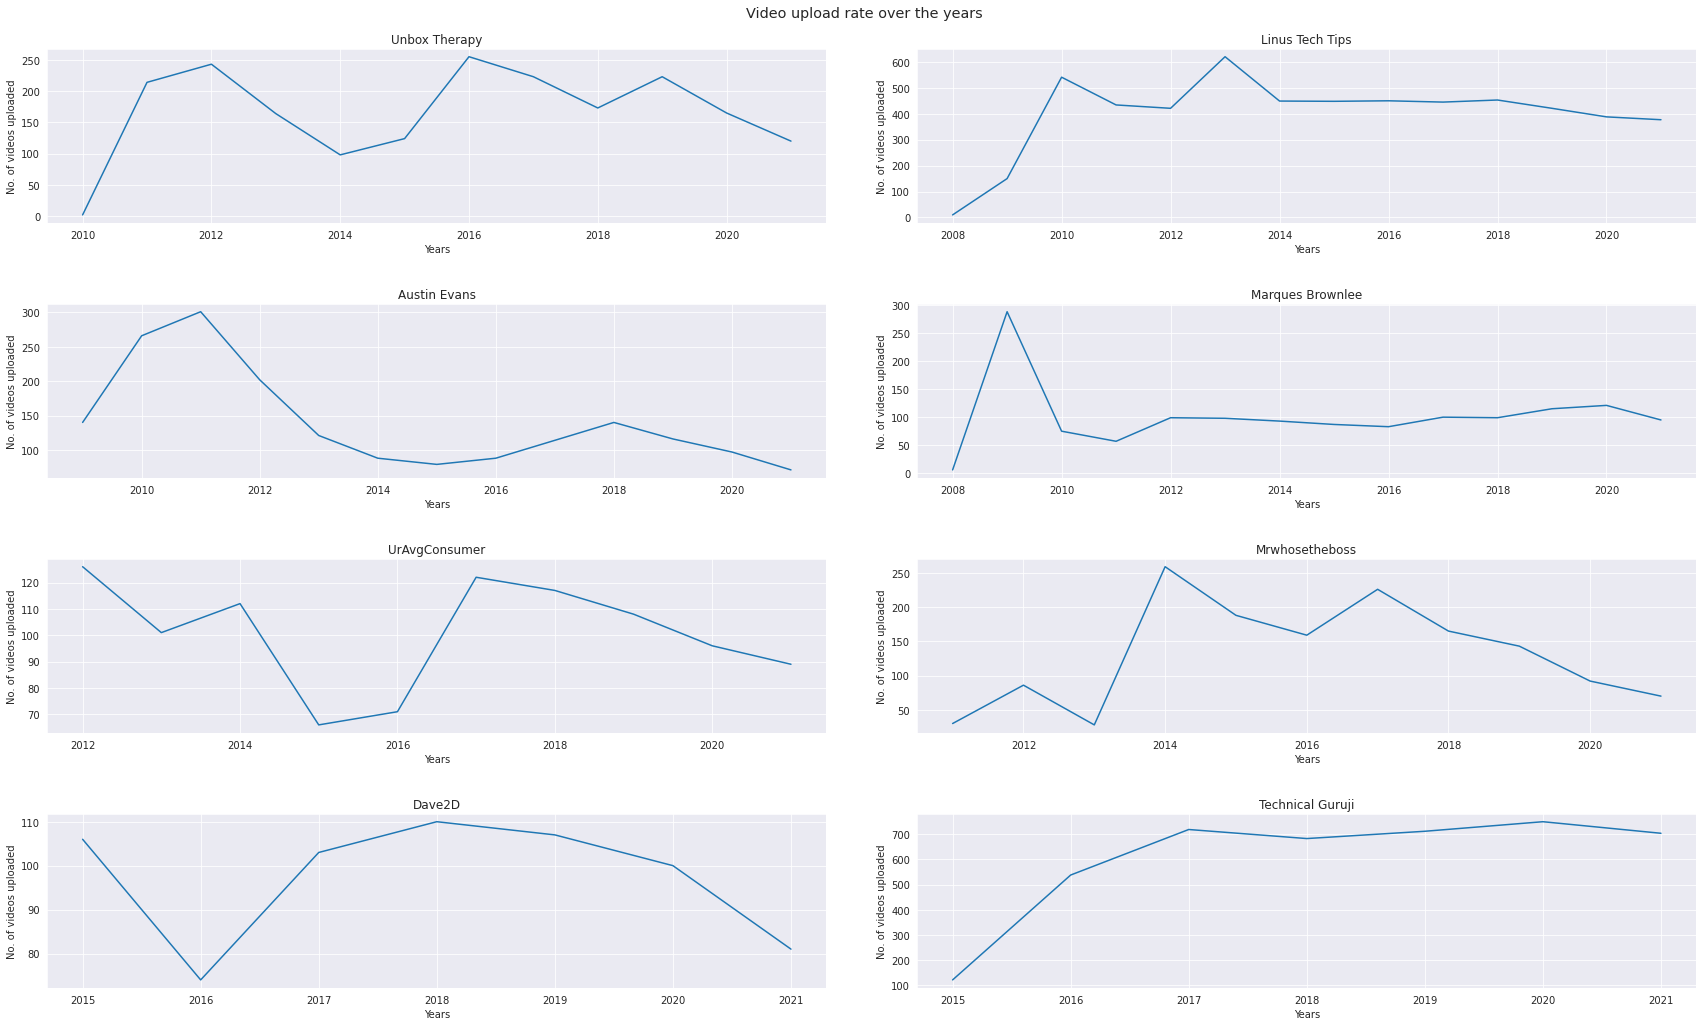

In [22]:
fig, axes = plt.subplots(4, 2, figsize=(25, 15))
sns.set_theme(style="darkgrid")
fig.tight_layout(pad=5.0)
fig.suptitle('Video upload rate over the years')


X,Y,plotdata = aggyear('Unbox Therapy')
l = sns.lineplot(ax=axes[0, 0], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded')
l.set_xlabel('Years')
axes[0][0].set_title('Unbox Therapy')


X,Y,plotdata = aggyear('Linus Tech Tips')
l= sns.lineplot(ax=axes[0, 1], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded')
l.set_xlabel('Years')
axes[0][1].set_title('Linus Tech Tips')


X,Y,plotdata = aggyear('Austin Evans')
l= sns.lineplot(ax=axes[1, 0], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded')
l.set_xlabel('Years')
axes[1][0].set_title('Austin Evans')


X,Y,plotdata = aggyear('Marques Brownlee')
l=sns.lineplot(ax=axes[1, 1], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded')
l.set_xlabel('Years')
axes[1][1].set_title('Marques Brownlee')


X,Y,plotdata = aggyear('UrAvgConsumer')
l=sns.lineplot(ax=axes[2, 0], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded')
l.set_xlabel('Years')
axes[2][0].set_title('UrAvgConsumer')


X,Y,plotdata = aggyear('Mrwhosetheboss')
l=sns.lineplot(ax=axes[2, 1], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded')
l.set_xlabel('Years')
axes[2][1].set_title('Mrwhosetheboss')


X,Y,plotdata = aggyear('Dave2D')
l=sns.lineplot(ax=axes[3, 0], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded')
l.set_xlabel('Years')
axes[3][0].set_title('Dave2D')


X,Y,plotdata = aggyear('Technical Guruji')
l=sns.lineplot(ax=axes[3, 1], x = X, y=Y,data = plotdata, markers ='+')
l.set_ylabel('No. of videos uploaded')
l.set_xlabel('Years')
axes[3][1].set_title('Technical Guruji')
plt.show()

#Working with Video Statistics

In [23]:
stats = pd.read_csv('/content/VideoStatistics.csv',index_col='Video_id')
stats.drop(columns='Unnamed: 0', inplace = True)

In [24]:
stats.head()

,Video_Channel_title,Stats_Comment,Stats_Fav,Stats_Like,Stats_view
Video_id,,,,,
tqaVPn4YFaY,Unbox Therapy,3292.0,0,28270.0,770804.0
Es1Uolu0chc,Unbox Therapy,2320.0,0,19927.0,1255720.0
xXpWulEEhGw,Unbox Therapy,1911.0,0,19447.0,1495515.0
JpV0KHGqn_w,Unbox Therapy,3875.0,0,37793.0,2668559.0
9zQq-3Kn0uM,Unbox Therapy,453.0,0,4528.0,1227592.0


In [25]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18282 entries, tqaVPn4YFaY to M_QU_Y93eLc
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Video_Channel_title  18282 non-null  object 
 1   Stats_Comment        18257 non-null  float64
 2   Stats_Fav            18282 non-null  int64  
 3   Stats_Like           18264 non-null  float64
 4   Stats_view           18270 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 857.0+ KB


In [26]:
stats.isnull().sum()

Video_Channel_title     0
Stats_Comment          25
Stats_Fav               0
Stats_Like             18
Stats_view             12
dtype: int64

In [27]:
stats[stats['Stats_Comment'].isnull()]

,Video_Channel_title,Stats_Comment,Stats_Fav,Stats_Like,Stats_view
Video_id,,,,,
IjrkRZBwboM,Unbox Therapy,NaN,0,36280.0,287713.0
_j5IYKxYN2I,Unbox Therapy,NaN,0,14108.0,88187.0
zgHURdLByjA,Unbox Therapy,NaN,0,2554.0,77164.0
WthlK86Un5c,Unbox Therapy,NaN,0,3972.0,198431.0
8syPkiANwYk,Marques Brownlee,NaN,0,104878.0,772888.0
TmikWdsrz_U,Marques Brownlee,NaN,0,43850.0,505162.0
R7siKvpvuCM,Marques Brownlee,NaN,0,34375.0,482524.0
TTWJq2MpCx4,Marques Brownlee,NaN,0,14833.0,143580.0
MQ97Kymd6X0,Marques Brownlee,NaN,0,4900.0,71556.0


In [28]:
#Fill null comments value with mean comment count
stats['Stats_Comment'].fillna(stats['Stats_Comment'].mean(), inplace = True)

#Handling the nulls with 'Likes' and 'View' in similar method
stats['Stats_Like'].fillna(stats['Stats_Like'].mean(), inplace = True)

stats['Stats_view'].fillna(stats['Stats_view'].mean(), inplace = True)



In [29]:
stats.isnull().sum()

Video_Channel_title    0
Stats_Comment          0
Stats_Fav              0
Stats_Like             0
Stats_view             0
dtype: int64

In [30]:
stats['Stats_Comment'] = stats['Stats_Comment'].astype(np.int64)
stats['Stats_Like'] = stats['Stats_Like'].astype(np.int64)
stats['Stats_view'] = stats['Stats_view'].astype(np.int64)

In [31]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18282 entries, tqaVPn4YFaY to M_QU_Y93eLc
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Video_Channel_title  18282 non-null  object
 1   Stats_Comment        18282 non-null  int64 
 2   Stats_Fav            18282 non-null  int64 
 3   Stats_Like           18282 non-null  int64 
 4   Stats_view           18282 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 857.0+ KB


In [32]:
stats

,Video_Channel_title,Stats_Comment,Stats_Fav,Stats_Like,Stats_view
Video_id,,,,,
tqaVPn4YFaY,Unbox Therapy,3292,0,28270,770804
Es1Uolu0chc,Unbox Therapy,2320,0,19927,1255720
xXpWulEEhGw,Unbox Therapy,1911,0,19447,1495515
JpV0KHGqn_w,Unbox Therapy,3875,0,37793,2668559
9zQq-3Kn0uM,Unbox Therapy,453,0,4528,1227592
...,...,...,...,...,...
wmEgqm4goWQ,Mrwhosetheboss,129,0,806,28767
3OqhMclB2QI,Mrwhosetheboss,290,0,1475,33728
8lP7i_CcRVg,Mrwhosetheboss,177,0,765,47432


#Channel Having Most Comments, Likes and Views on a Video

In [33]:
group = stats.groupby(by='Video_Channel_title').max()

In [37]:
group

,Stats_Comment,Stats_Fav,Stats_Like,Stats_view
Video_Channel_title,,,,
Austin Evans,54641,0,396804,24109452
Dave2D,26313,0,336342,30820731
Linus Tech Tips,226781,0,506653,20753756
Marques Brownlee,340207,0,654401,33686783
Mrwhosetheboss,280473,0,918771,23785983
Technical Guruji,799663,0,2097566,17780805
Unbox Therapy,1674945,0,418054,73495719
UrAvgConsumer,72105,0,158120,8513830


Text(0, 0.5, 'No. of comments')

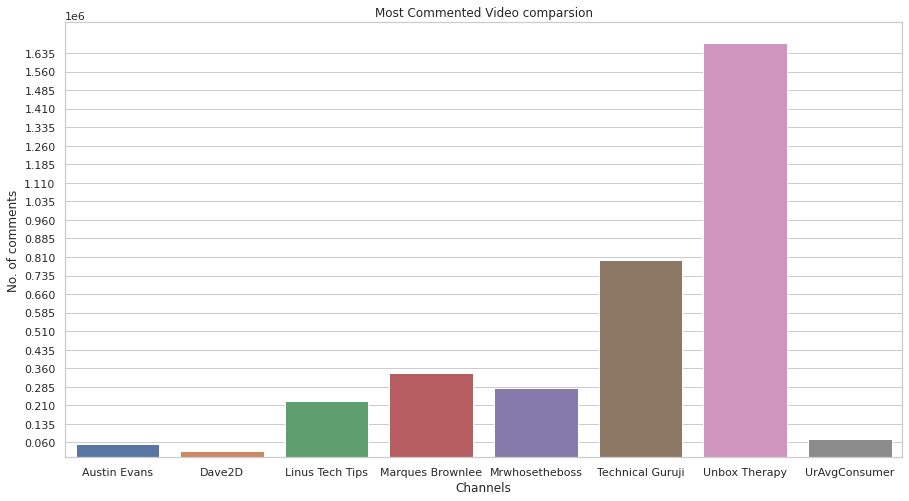

In [92]:
fig = plt.figure(figsize=(15,8))
bar = sns.barplot(x=group.index, y='Stats_Comment', data=group)
step_value = 75000
bar.set_yticks(np.arange(60000, 1674945, step_value))
bar.set_title('Most Commented Video comparsion')
bar.set_xlabel('Channels')
bar.set_ylabel('No. of comments')

Text(0, 0.5, 'No. of Likes')

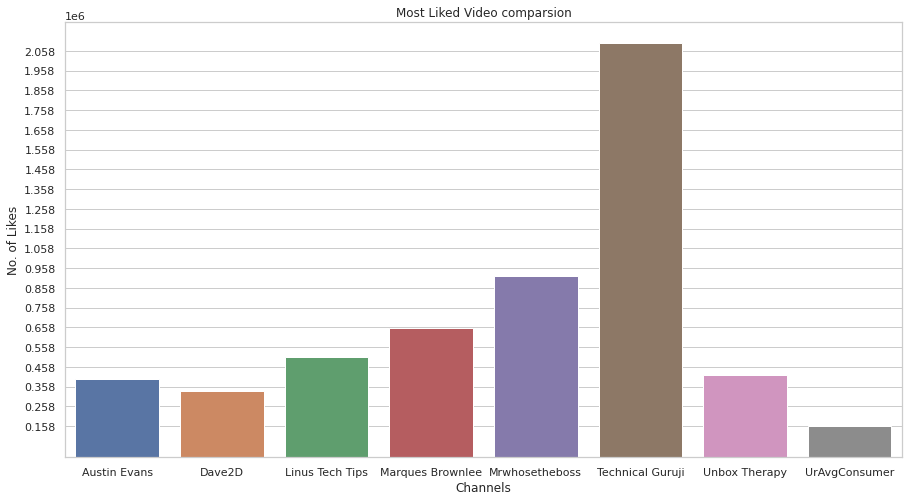

In [91]:
fig = plt.figure(figsize=(15,8))
bar = sns.barplot(x=group.index, y='Stats_Like', data=group)
step_value = 100000
bar.set_yticks(np.arange(158120, 2097566, step_value))
bar.set_title('Most Liked Video comparsion')
bar.set_xlabel('Channels')
bar.set_ylabel('No. of Likes')

Text(0, 0.5, 'No. of Views')

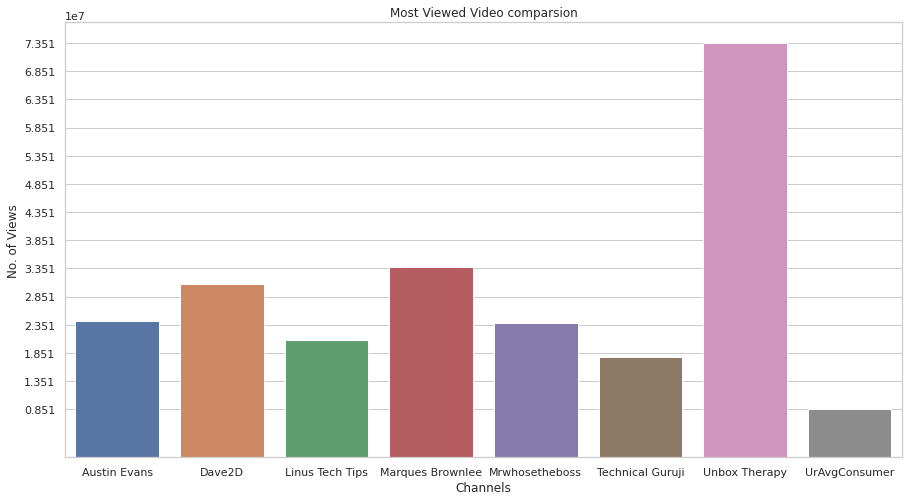

In [88]:
fig = plt.figure(figsize=(15,8))
bar = sns.barplot(x=group.index, y='Stats_view', data=group)
step_value = 5000000
bar.set_yticks(np.arange(8513830, 74495719, step_value))
bar.set_title('Most Viewed Video comparsion')
bar.set_xlabel('Channels')
bar.set_ylabel('No. of Views')

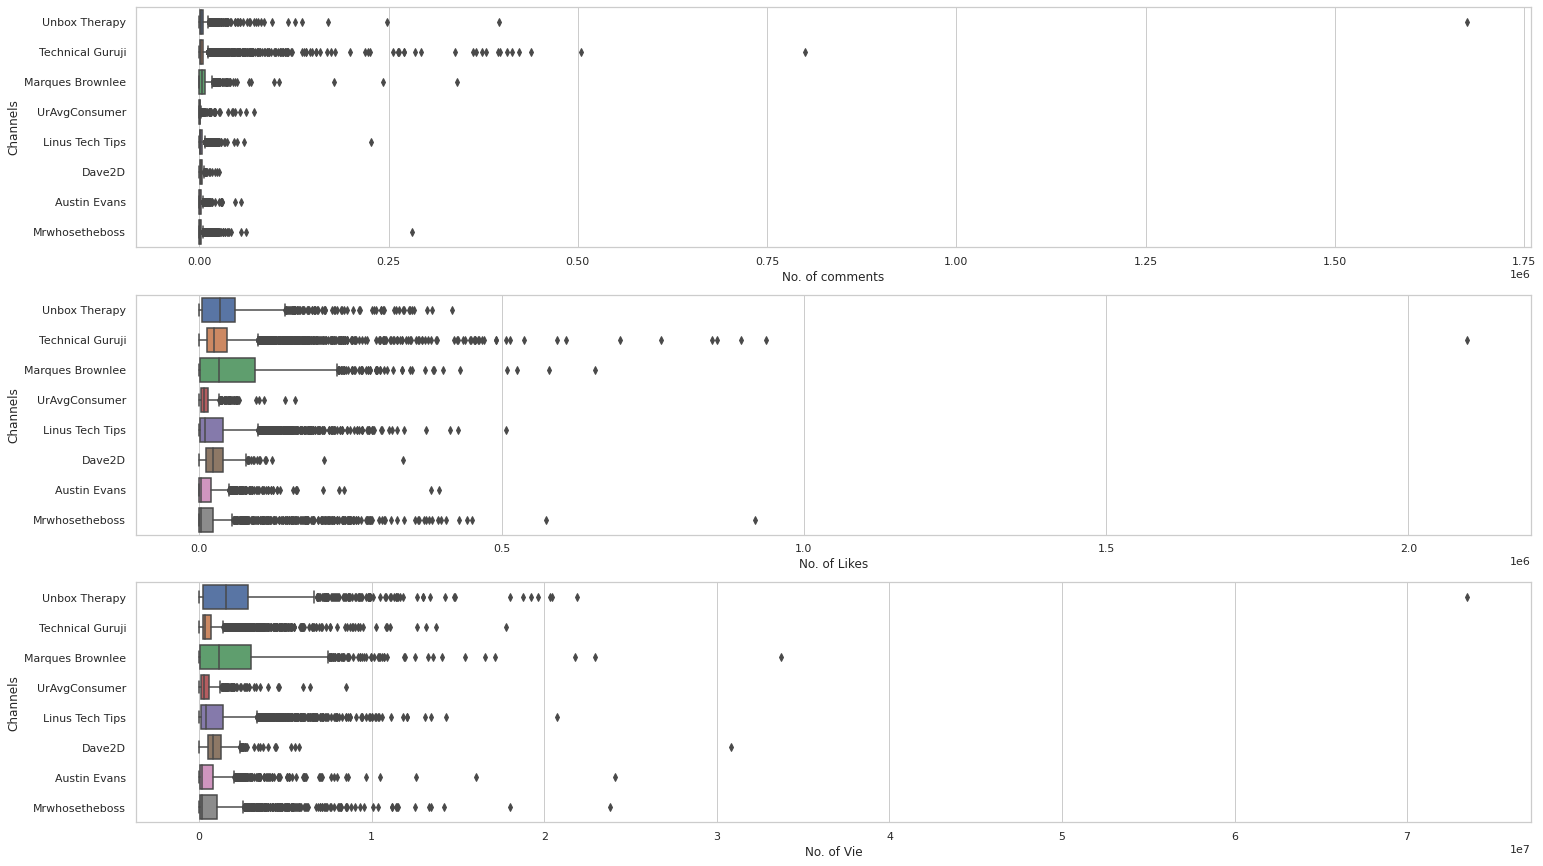

In [94]:
fig, axes = plt.subplots(3, 1, figsize=(25, 15))

b = sns.boxplot(x=stats['Stats_Comment'], y=stats['Video_Channel_title'], ax=axes[0])
b.set_xlabel('No. of comments')
b.set_ylabel('Channels')


b = sns.boxplot(x=stats['Stats_Like'], y=stats['Video_Channel_title'],    ax=axes[1])
b.set_xlabel('No. of Likes')
b.set_ylabel('Channels')


b = sns.boxplot(x=stats['Stats_view'], y=stats['Video_Channel_title'],    ax=axes[2])
b.set_xlabel('No. of Vie')
b.set_ylabel('Channels')
plt.show()

#Handling outliers 

In [95]:
stats.Stats_Comment.describe().apply(lambda x: format(x, '.2f'))

count      18282.00
mean        4463.07
std        20926.38
min            3.00
25%          437.25
50%         1645.00
75%         4015.00
max      1674945.00
Name: Stats_Comment, dtype: object

#Identifying outliers with the "1.5xIQR rule"

A commonly used rule says that a data point is an outlier if it is more than 1.5 x IQR, above the third quartile or below the first quartile.

* Low outliers --->  Q1 - 1.5 x IQR

* High outliers ---> Q3 + 1.5 x IQR

In [96]:
def BoxLimits(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    L_limit = Q1 - (1.5 * IQR)
    U_limit = Q3 + (1.5 * IQR)
    u = max(x[x<U_limit])
    l = min(x[x>L_limit])
    return [u,l]

#Removing only Comment stats Outliers

In [97]:
upper, lower = BoxLimits(stats['Stats_Comment'])
print('Upper limit of comments ',upper)
print('Lower limit of comments', lower)

Upper limit of comments  9381
Lower limit of comments 3


In [98]:
comment_outliers = stats[(stats['Stats_Comment'] < lower) | (stats['Stats_Comment'] > upper) ].index
stats[(stats['Stats_Comment'] < lower) | (stats['Stats_Comment'] > upper) ]

,Video_Channel_title,Stats_Comment,Stats_Fav,Stats_Like,Stats_view
Video_id,,,,,
JmPXK2z2auA,Unbox Therapy,28945,0,9196,863631
blVJ775UBQI,Unbox Therapy,13346,0,26298,2369021
SRUewOtcpzY,Unbox Therapy,14916,0,63498,1397215
cHureRnU8M8,Unbox Therapy,10777,0,74870,2978392
yXCt2MpB-rQ,Unbox Therapy,17173,0,41225,1318802
...,...,...,...,...,...
FSmwmQnPMqo,Mrwhosetheboss,62223,0,24996,609575
LC0SN_OIo6E,Mrwhosetheboss,38374,0,18474,218119
kcLqRLXW8oM,Mrwhosetheboss,9966,0,6474,131650


In [99]:
comments = stats.drop(index = comment_outliers)

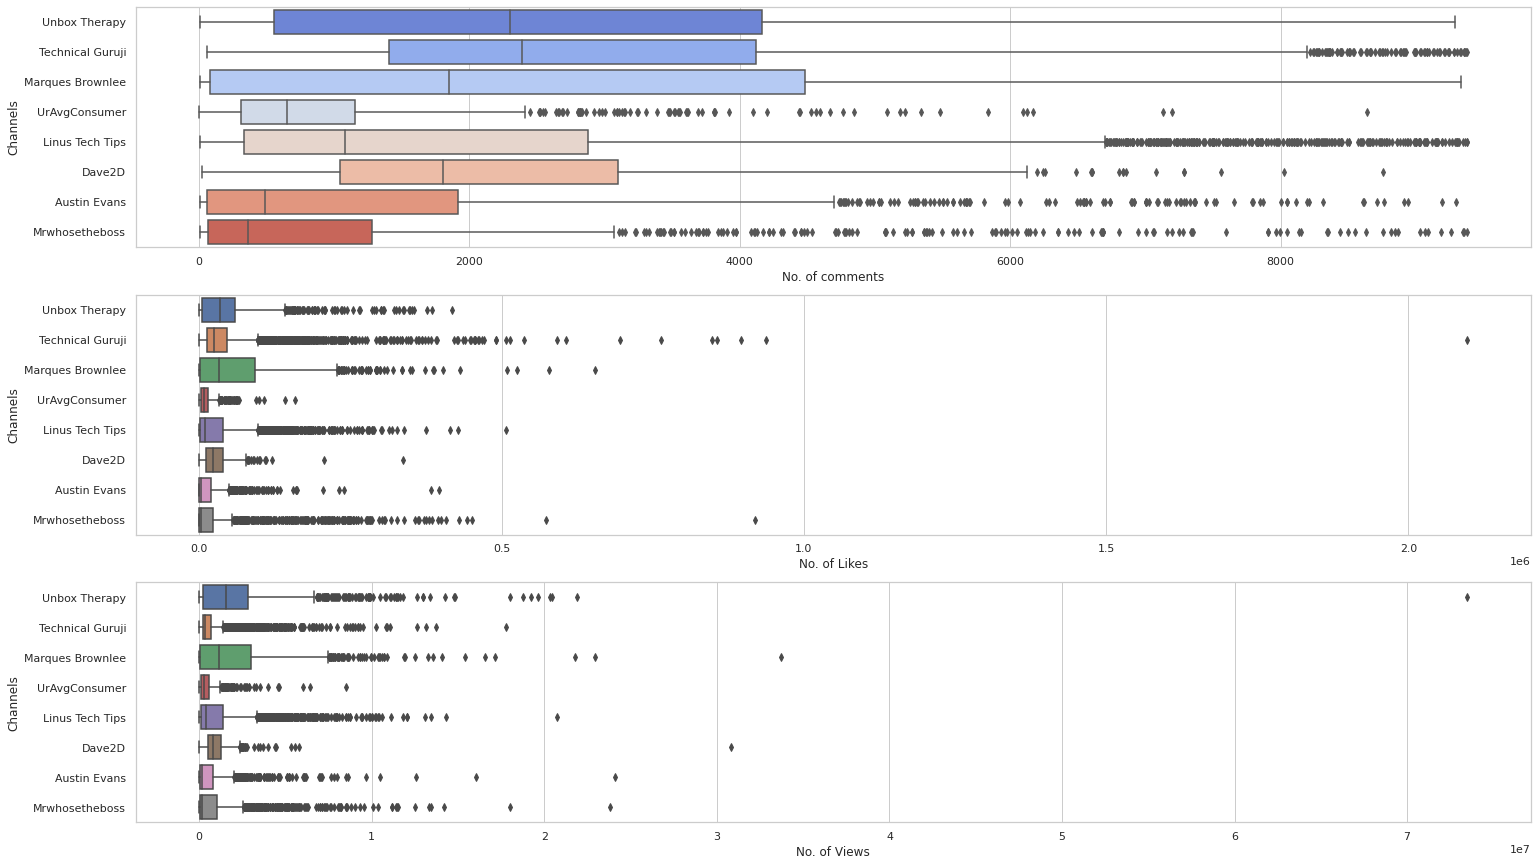

In [100]:
fig, axes = plt.subplots(3, 1, figsize=(25, 15))

b = sns.boxplot(x=comments['Stats_Comment'], y=comments['Video_Channel_title'], ax=axes[0], palette='coolwarm')
b.set_xlabel('No. of comments')
b.set_ylabel('Channels')


b = sns.boxplot(x=stats['Stats_Like'], y=stats['Video_Channel_title'],    ax=axes[1])
b.set_xlabel('No. of Likes')
b.set_ylabel('Channels')


b = sns.boxplot(x=stats['Stats_view'], y=stats['Video_Channel_title'],    ax=axes[2])
b.set_xlabel('No. of Views')
b.set_ylabel('Channels')

plt.show()

#Removing only Likes Outliers

In [101]:
upper, lower = BoxLimits(stats['Stats_Like'])
print('Upper limit of likes ',upper)
print('Lower limit of likes', lower)

Upper limit of likes  102867
Lower limit of likes 8


In [102]:
like_outliers = stats[(stats['Stats_Like'] < lower) | (stats['Stats_Like'] > upper) ].index
stats[(stats['Stats_Like'] < lower) | (stats['Stats_Like'] > upper) ]

,Video_Channel_title,Stats_Comment,Stats_Fav,Stats_Like,Stats_view
Video_id,,,,,
8dhmFQecoM8,Unbox Therapy,23624,0,106151,3777587
04SojlMj9FQ,Unbox Therapy,96391,0,130646,6014370
p_vaT0Kn1Qg,Unbox Therapy,13883,0,124211,4040312
LjzkSwyRoxY,Unbox Therapy,15530,0,112596,4357054
Q4P9wJApo38,Unbox Therapy,10472,0,135008,3101491
...,...,...,...,...,...
7dUmekh6m3A,Mrwhosetheboss,5400,0,125577,3281485
RI59KEYW19Q,Mrwhosetheboss,5079,0,122995,3970481
uE1xN8d3WAY,Mrwhosetheboss,1871,0,104167,3333912


In [103]:
likes = stats.drop(index = like_outliers)

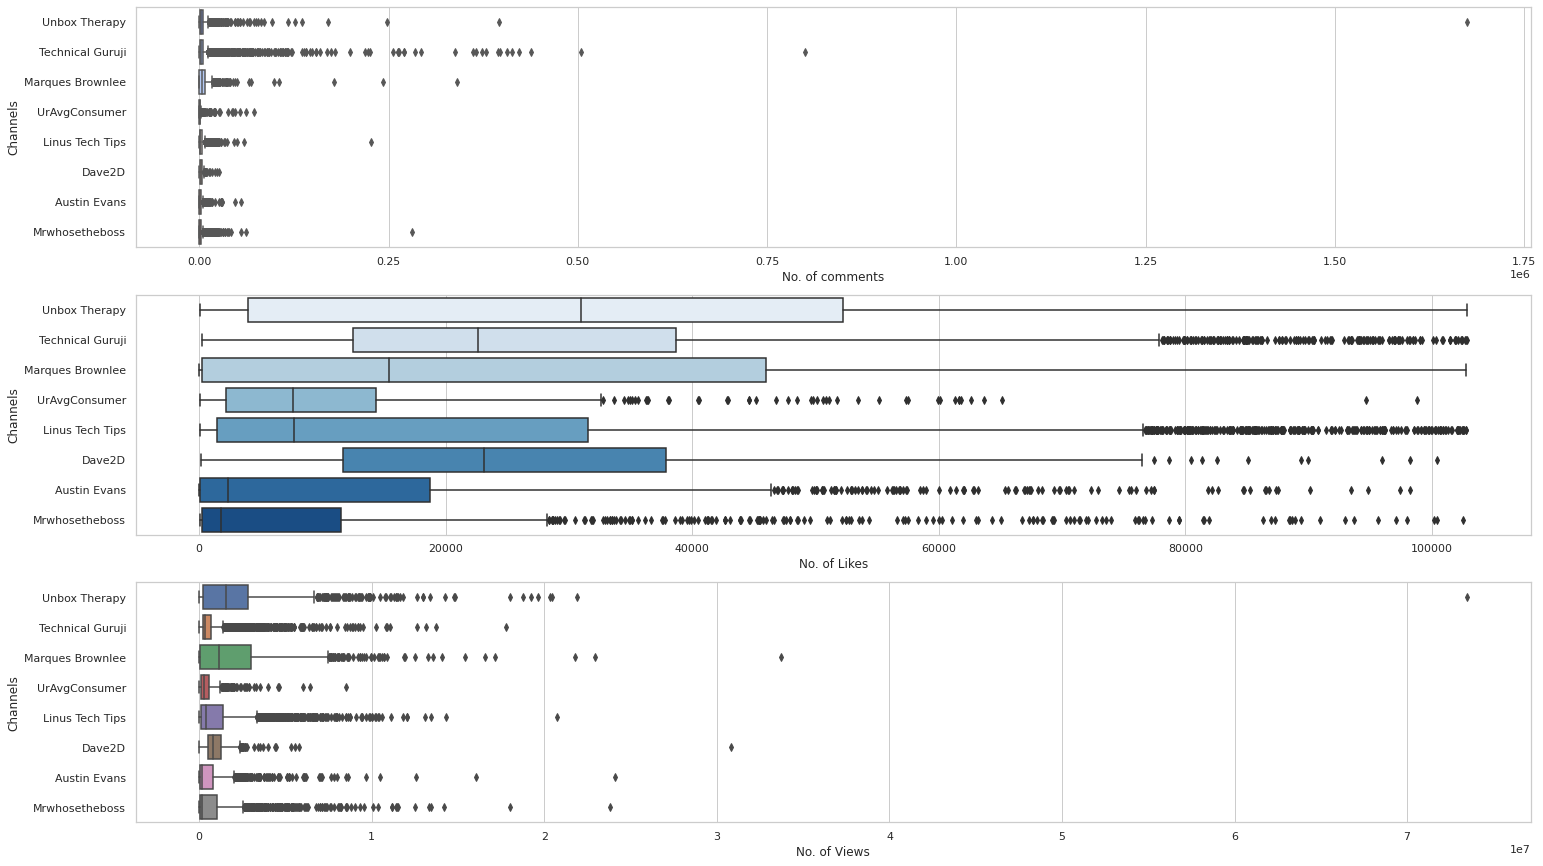

In [109]:
fig, axes = plt.subplots(3, 1, figsize=(25, 15))

b = sns.boxplot(x=stats['Stats_Comment'], y=stats['Video_Channel_title'], ax=axes[0], palette='coolwarm')
b.set_xlabel('No. of comments')
b.set_ylabel('Channels')


b = sns.boxplot(x=likes['Stats_Like'], y=likes['Video_Channel_title'],    ax=axes[1], palette='Blues')
b.set_xlabel('No. of Likes')
b.set_ylabel('Channels')


b = sns.boxplot(x=stats['Stats_view'], y=stats['Video_Channel_title'],    ax=axes[2])
b.set_xlabel('No. of Views')
b.set_ylabel('Channels')

plt.show()

In [106]:
upper, lower = BoxLimits(stats['Stats_view'])
print('Upper limit of Views ',upper)
print('Lower limit of Views', lower)

Upper limit of Views  3165632
Lower limit of Views 0


In [107]:
View_outliers = stats[(stats['Stats_view'] < lower) | (stats['Stats_view'] > upper) ].index
stats[(stats['Stats_view'] < lower) | (stats['Stats_view'] > upper) ]

,Video_Channel_title,Stats_Comment,Stats_Fav,Stats_Like,Stats_view
Video_id,,,,,
Qm5BFYifDZI,Unbox Therapy,1987,0,18045,3231481
4fOl2ztxBVk,Unbox Therapy,2717,0,29965,3338315
qWed1Yye5Og,Unbox Therapy,8304,0,82564,3353943
8dhmFQecoM8,Unbox Therapy,23624,0,106151,3777587
Ke6-hZ16s-0,Unbox Therapy,7544,0,59952,3179491
...,...,...,...,...,...
LB3BQVqlXm0,Mrwhosetheboss,3971,0,71391,5051207
pxMi0DdBMfw,Mrwhosetheboss,6429,0,76247,8199799
86BX_0av_cg,Mrwhosetheboss,984,0,22434,3530096


In [108]:
view = stats.drop(index = View_outliers)

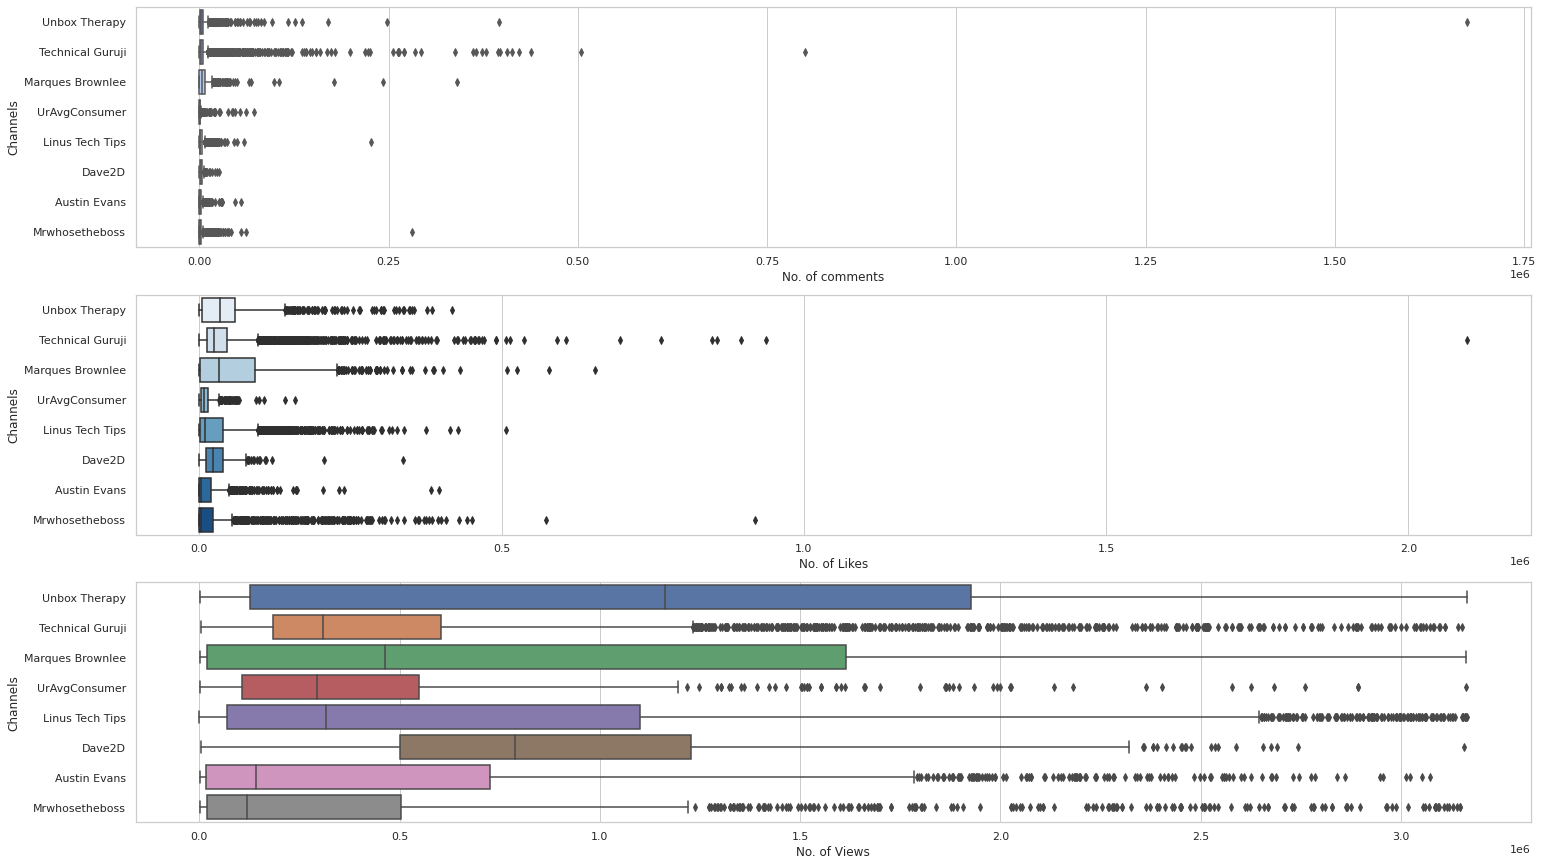

In [110]:
fig, axes = plt.subplots(3, 1, figsize=(25, 15))

b = sns.boxplot(x=stats['Stats_Comment'], y=stats['Video_Channel_title'], ax=axes[0], palette='coolwarm')
b.set_xlabel('No. of comments')
b.set_ylabel('Channels')


b = sns.boxplot(x=stats['Stats_Like'], y=stats['Video_Channel_title'],    ax=axes[1], palette='Blues')
b.set_xlabel('No. of Likes')
b.set_ylabel('Channels')


b = sns.boxplot(x=view['Stats_view'], y=view['Video_Channel_title'],    ax=axes[2])
b.set_xlabel('No. of Views')
b.set_ylabel('Channels')

plt.show()

In [126]:
outliers = []
outliers = comment_outliers.append(like_outliers)
outliers = outliers.append(View_outliers)

In [128]:
outliers = set(outliers)

In [129]:
len(outliers)

2382

In [131]:
statsdf = stats.drop(index = outliers)

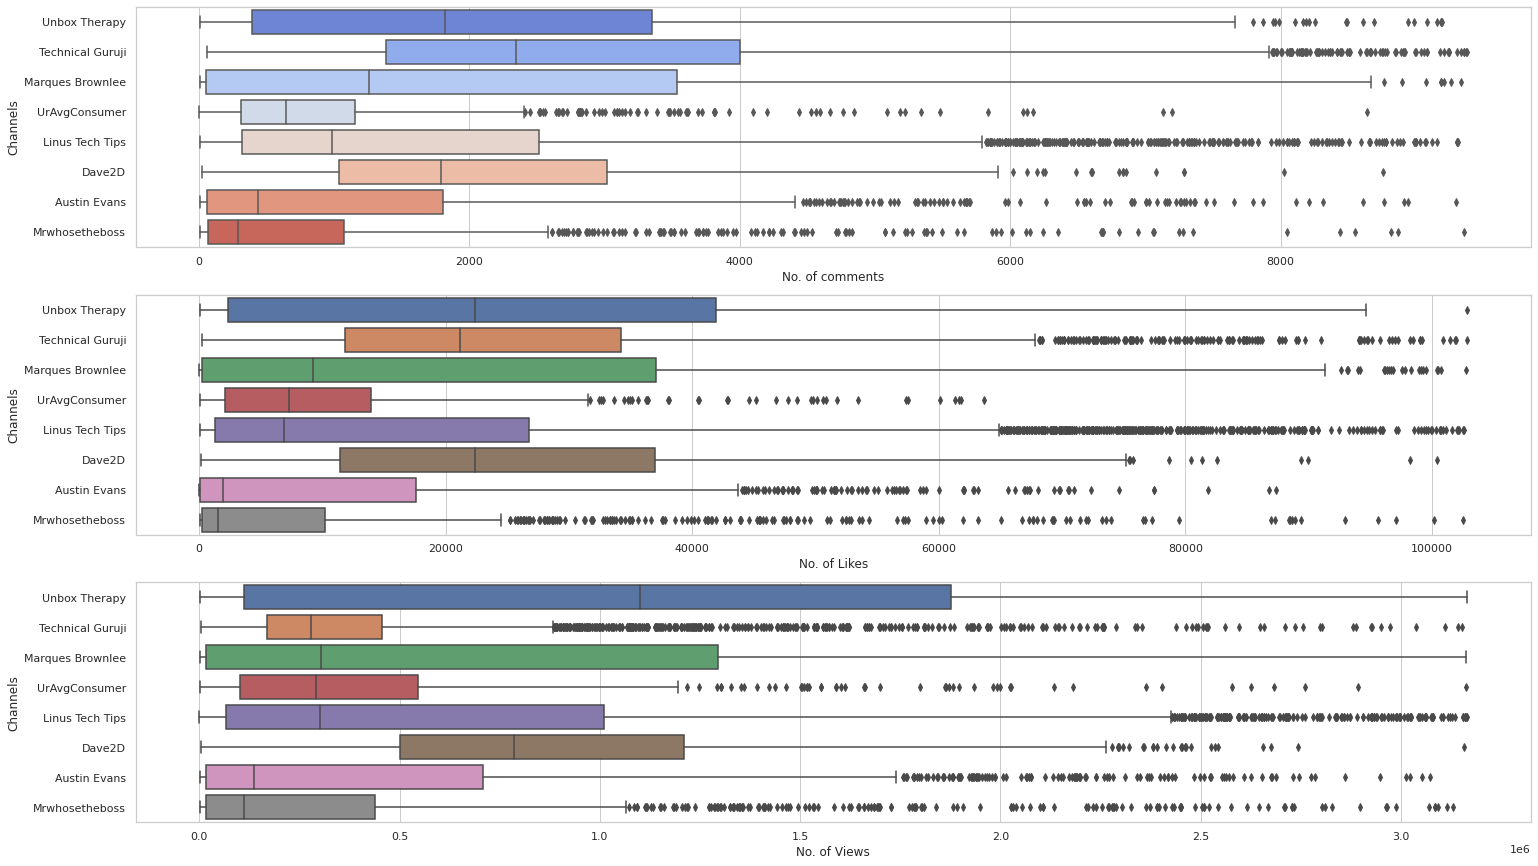

In [133]:
fig, axes = plt.subplots(3, 1, figsize=(25, 15))

b = sns.boxplot(x=statsdf['Stats_Comment'], y=statsdf['Video_Channel_title'], ax=axes[0], palette='coolwarm')
b.set_xlabel('No. of comments')
b.set_ylabel('Channels')


b = sns.boxplot(x=statsdf['Stats_Like'], y=statsdf['Video_Channel_title'],    ax=axes[1])
b.set_xlabel('No. of Likes')
b.set_ylabel('Channels')


b = sns.boxplot(x=statsdf['Stats_view'], y=statsdf['Video_Channel_title'],    ax=axes[2])
b.set_xlabel('No. of Views')
b.set_ylabel('Channels')

plt.show()